In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the data

df_answers = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Supervised marchine learning\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')
df_temp = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\dataset_scaled_temp.csv')
df_unscaled = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\Dataset-weather-prediction-dataset-processed.csv')

In [108]:
df_temp.head()

,Unnamed: 0,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,...,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,11323,1991-01-01,1,-0.773075,-0.631005,-1.028583,-0.826356,-0.871621,-0.953178,-0.787848,...,-0.813810,-0.817231,-1.230904,-0.781005,-1.302981,-0.808980,-0.928711,-1.299234,-0.837763,-0.878510
1,11324,1991-01-02,1,-0.678010,-1.119018,-0.910949,0.012222,0.100337,-0.799717,-0.665550,...,-1.213407,-0.082081,-1.473528,-0.466820,-0.635564,-1.398318,-0.826335,-0.689646,-0.320071,-0.638173
2,11325,1991-01-03,1,-0.026139,-0.812591,-0.675681,-0.320045,-0.312009,-0.428855,-0.595665,...,-0.486867,-0.277121,-1.527444,-0.026962,-0.890396,-1.263612,0.095046,-0.478156,-0.288696,-1.569480
3,11326,1991-01-04,1,-0.610107,-0.778544,-0.946239,-0.668134,-0.577088,-0.774141,-0.945090,...,-0.281014,-0.637194,-1.311779,-0.416551,-0.647699,-0.775304,-0.138956,-0.726968,-0.790700,-1.329143
4,11327,1991-01-05,1,-0.637268,-0.801242,-0.805078,-0.731423,-0.606541,-0.748564,-0.875205,...,-1.031772,-0.787225,-1.392653,-0.781005,-0.429272,-1.027877,-0.914086,-0.478156,-0.853451,-1.539438


In [107]:
(df_answers_1991['MADRID_pleasant_weather'] == 0).sum()


218

In [4]:
# We choose to focus on a single year for analysis the Pleasant weather f

df_answers_1991 = df_answers[df_answers['DATE'].astype(str).str.contains('1991')] #<-----INSERT YEAR HERE

In [86]:
df_answers_1991.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
11323,19910101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11324,19910102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11325,19910103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11326,19910104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11327,19910105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_temp[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']]
y = df_answers_1991.drop(['DATE'], axis=1)

In [9]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 15)
(92, 15)
(273, 15)
(92, 15)


In [11]:
X_train[:10]

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
155,0.408442,0.197483,0.347735,-0.051067,0.173970,-0.106469,0.068127,0.070147,0.067949,0.683127,-0.077232,0.335224,0.007295,0.268279,0.443345
261,0.897346,0.322323,0.571240,0.534356,0.615769,0.330313,0.806454,0.675597,0.863111,1.586226,0.827619,0.456572,1.367429,0.741020,0.773809
132,0.123248,-0.142992,0.347735,0.312844,0.704129,0.697210,0.599723,0.397090,0.383013,0.251796,-0.052097,0.759944,-0.416832,0.604174,0.413303
222,1.657862,1.332397,1.618183,1.372934,1.352100,1.465945,1.884411,1.620100,1.298199,1.195332,1.757605,1.233203,1.879307,1.226203,1.554905
140,0.666475,0.469862,0.524186,0.803334,0.836668,1.203876,0.895053,0.820905,0.728083,0.561815,0.613974,0.796348,-0.007330,0.591734,0.383261
17,-1.506430,-1.754571,-1.593226,-1.601646,-1.342873,-0.630607,-1.836755,-1.891511,-1.537377,-0.974801,-1.937203,-1.023880,-0.723959,-1.062863,-0.397835
148,0.843023,-0.211087,0.135994,0.328667,1.013388,0.138129,0.806454,0.687706,0.713080,0.979667,0.425463,1.208933,-0.241331,0.666377,1.224441
24,-1.560753,-1.448144,-1.252087,-1.538357,-1.431233,-1.574056,-1.334693,-1.273952,-1.582386,-1.150029,-1.434508,-1.290846,-0.372957,-0.677205,-1.028721
198,1.318346,0.719543,1.006486,0.771689,0.939755,1.238819,0.791687,1.184176,0.773092,2.165827,1.242343,1.051180,0.665425,1.126678,1.164357
320,-0.990365,-0.335927,-0.569810,-1.395957,-1.004160,-1.084860,-0.906464,-0.680611,-1.057280,-0.610866,-1.044919,-1.375790,-1.118837,-1.162388,-0.427878


In [12]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 3.63688124e-01  2.54120865e-01  3.64372428e-01 -4.88940725e-02
   1.08756420e-01 -1.00077571e-01  3.11368458e-02  7.70228718e-02
   7.29225189e-02  5.41500177e-01 -1.44316954e-02  2.57753299e-01
   1.11888825e-04  2.01707715e-01  2.64302755e-01]
 [ 8.37736781e-01  3.80090650e-01  5.84190965e-01  5.18782969e-01
   5.35344104e-01  3.22327760e-01  7.06841051e-01  6.61437658e-01
   8.43080130e-01  1.34648878e+00  8.66529187e-01  3.89009876e-01
   1.42048458e+00  7.39767843e-01  5.39893440e-01]
 [ 8.71597399e-02 -8.94330941e-02  3.64372428e-01  3.03986250e-01
   6.20661641e-01  6.77148237e-01  5.17643873e-01  3.92606856e-01
   3.78079308e-01  1.57028010e-01  1.00394403e-02  7.17151318e-01
  -4.42800025e-01  5.84013595e-01  2.39249056e-01]
 [ 1.57514580e+00  1.39930073e+00  1.61386727e+00  1.33194197e+00
   1.24632358e+00  1.42058162e+00  1.69336919e+00  1.57312472e+00
   1.26448712e+00  9.98060875e-01  1.77196121e+00  1.22905197e+00
   1.95503344e+00  1.29198745e+00  1.19128961e+00]
 [ 6

In [13]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [74]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(50,25,5), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 25, 5), max_iter=1000)

In [75]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5238095238095238
0.5978260869565217


C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


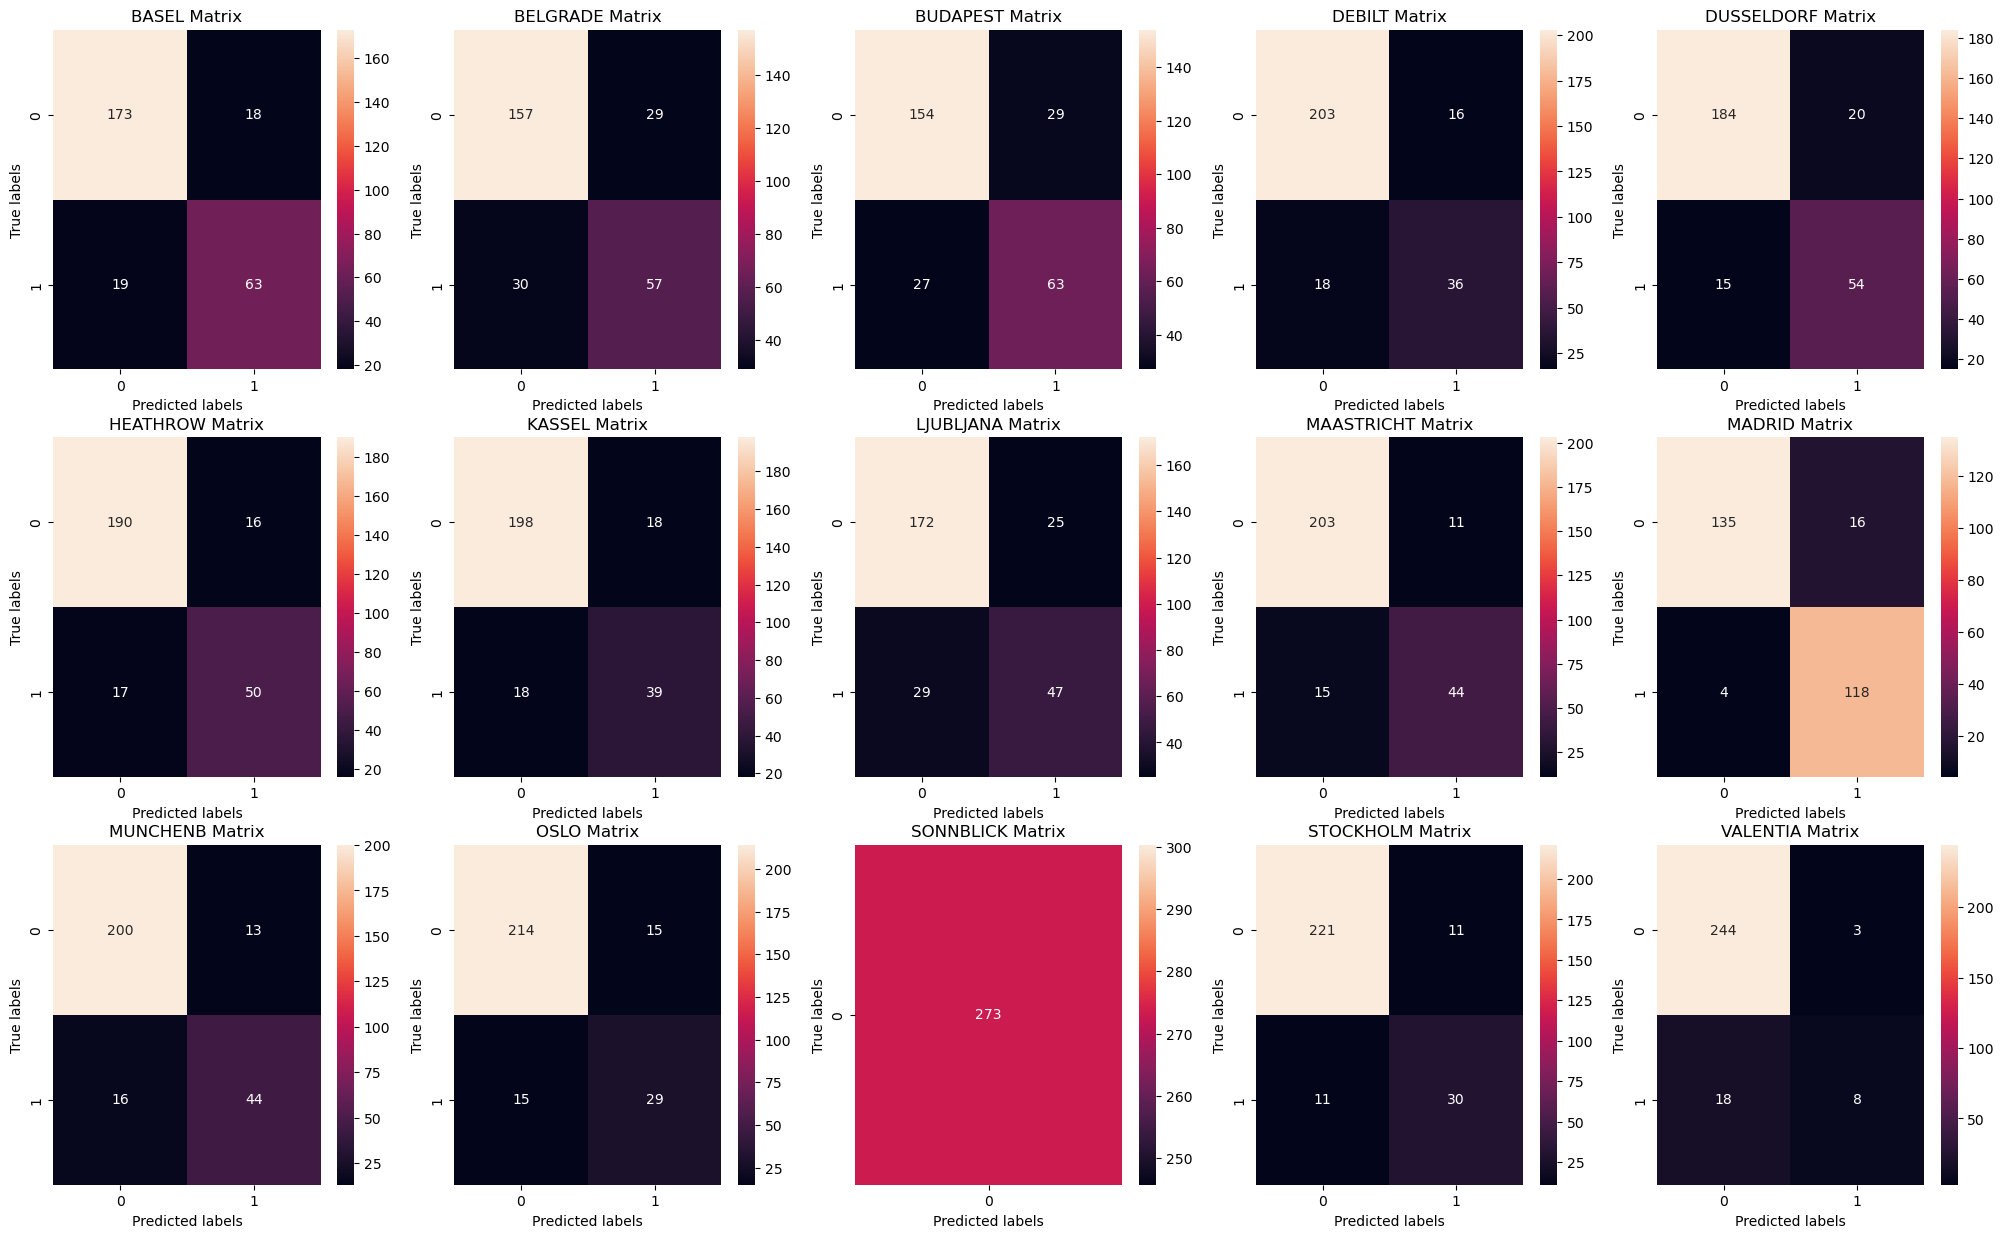

In [63]:
locations = list({x.split("_")[0] for x in df_temp[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']].columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


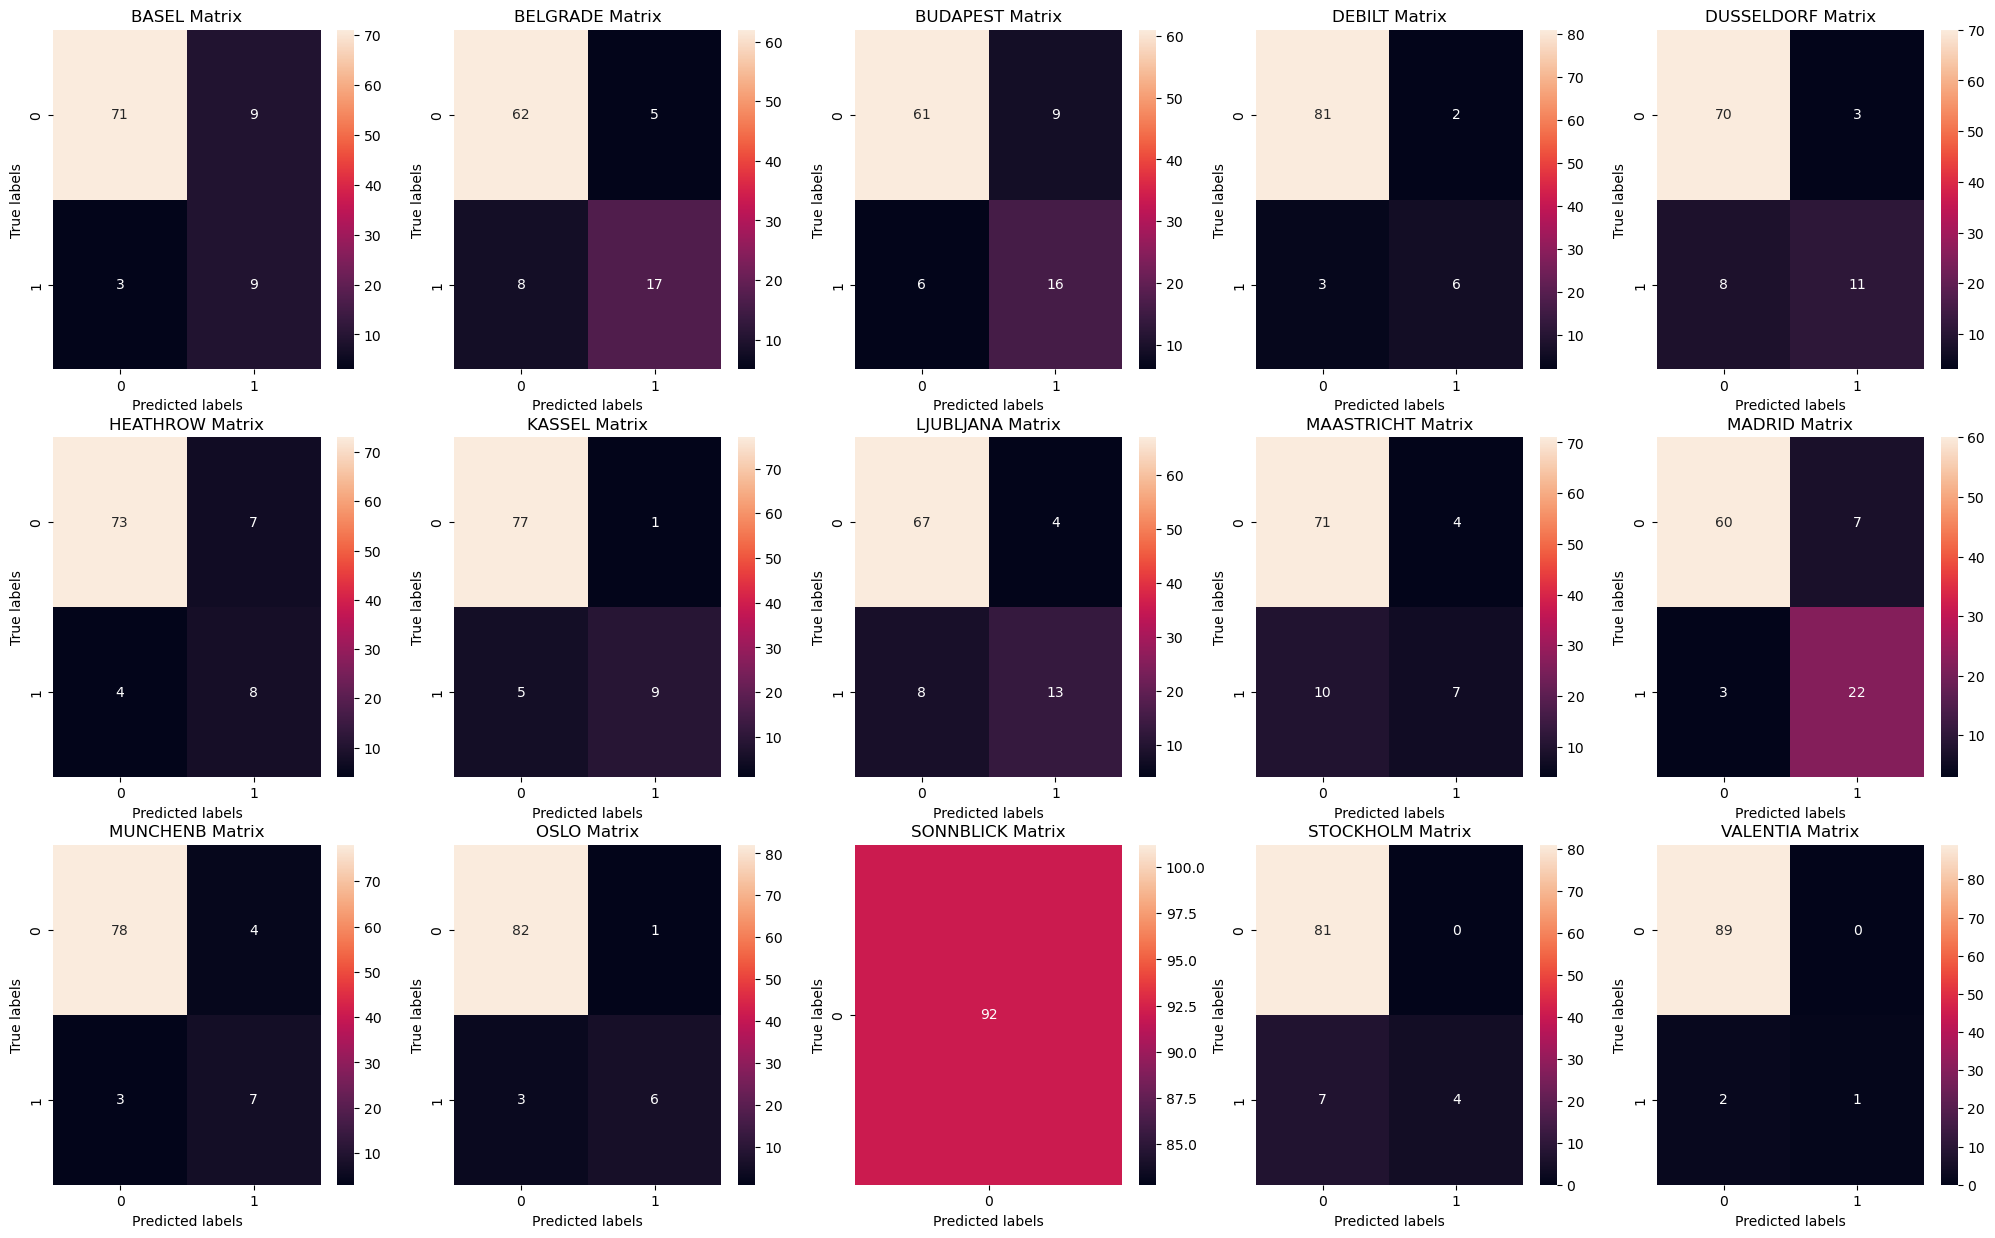

In [65]:
# Testing 

locations = list({x.split("_")[0] for x in df_temp[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']].columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1